In [1]:
#extract meta data of special subject id from idenity_meta.csv file
import os
import pandas as pd

subjectid = os.listdir('D:\cnnface/female_male_test_51_addnoise/pure')

subject_meta = pd.read_csv('D:/VGGface2/meta_data/identity_meta.csv',error_bad_lines=False)

for i,subid in enumerate(subjectid):
    if i == 0:
        subject_meta_part = subject_meta[subject_meta["Class_ID"].str.contains(subid)]
    else:
        subject_meta_tmp = subject_meta[subject_meta["Class_ID"].str.contains(subid)]
        subject_meta_part = pd.concat([subject_meta_part,subject_meta_tmp])

b'Skipping line 1308: expected 5 fields, saw 6\nSkipping line 1365: expected 5 fields, saw 6\nSkipping line 1413: expected 5 fields, saw 6\nSkipping line 1451: expected 5 fields, saw 6\nSkipping line 1729: expected 5 fields, saw 6\nSkipping line 1814: expected 5 fields, saw 6\nSkipping line 1854: expected 5 fields, saw 6\nSkipping line 2151: expected 5 fields, saw 6\nSkipping line 2243: expected 5 fields, saw 6\nSkipping line 2988: expected 5 fields, saw 6\nSkipping line 3308: expected 5 fields, saw 6\nSkipping line 4201: expected 5 fields, saw 6\nSkipping line 4401: expected 5 fields, saw 6\nSkipping line 4404: expected 5 fields, saw 6\nSkipping line 4656: expected 5 fields, saw 6\nSkipping line 5056: expected 5 fields, saw 6\nSkipping line 7238: expected 5 fields, saw 6\nSkipping line 7309: expected 5 fields, saw 6\n'


In [2]:
#Count the number of female pictures or male pictures
subject_fe_meta_part = subject_meta_part[subject_meta_part[" Gender"].str.contains(' f')]
subject_ma_meta_part = subject_meta_part[subject_meta_part[" Gender"].str.contains(' m')]

female_id = list(subject_fe_meta_part["Class_ID"])
male_id = list(subject_ma_meta_part["Class_ID"])

prepath = 'D:\cnnface/female_male_test_51_addnoise/pure'
female_path = [prepath +'/'+ id for id in female_id]
male_path = [prepath + '/' + id for id in male_id]

pic_num = [len(os.listdir(path)) for path in female_path]
female_pic_num = sum(pic_num)
pic_num = [len(os.listdir(path)) for path in male_path]
male_pic_num = sum(pic_num)

In [5]:
print(female_id)
print(male_id)
fe = set(female_id)
ma = set(male_id)
sid = set(os.listdir('D:\cnnface/female_male_test_51_addnoise/pure'))
print(sid-fe-ma)

print(female_pic_num)
print(male_pic_num)

['n001181', 'n001333', 'n001459', 'n001617', 'n002085', 'n002285', 'n002464', 'n002724', 'n003381', 'n004029', 'n004626', 'n004655', 'n005458', 'n005591', 'n006309', 'n008049', 'n008148', 'n008391']
['n000004', 'n000006', 'n000061', 'n000081', 'n000142', 'n000154', 'n000551', 'n000598', 'n000866', 'n001479', 'n001891', 'n001967', 'n002002', 'n002332', 'n002744', 'n003177', 'n004122', 'n004535', 'n005265', 'n005653', 'n006208', 'n006815', 'n006912', 'n007311', 'n007338', 'n007353', 'n007425', 'n007873', 'n008373', 'n008455', 'n008911', 'n009017']
{'n003346'}
7481
13592


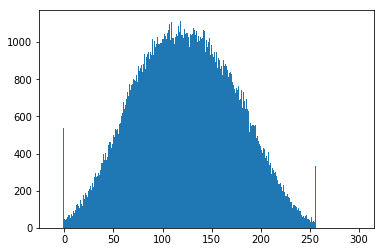

In [32]:
# plot the frequence of image
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

image = Image.open('D:/cnnface/noise_picture/moise_picture_test/noise_img_99006.jpg')
image_array = np.array(image)

image_array = image_array.reshape(-1)

bins = np.linspace(-10,300,3b10)
plt.hist(image_array,bins)
plt.show()


In [15]:
# read face pictures from folder and add noise

import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

pic = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/mft_save_rgb.jpg')
pic_arr = np.array(pic)
print(pic_arr.dtype)

sigma_list = np.arange(0,101,10).astype('uint8')
print(sigma_list)

for i,sigma in enumerate(sigma_list):
    sigma = sigma
    print(sigma)
    
    noise_image = pic_arr + np.random.randn(pic_arr.shape[0],pic_arr.shape[1],
                                            pic_arr.shape[2]) * sigma
    img_noise = Image.fromarray(noise_image.astype('uint8'))
    plt.show(img_noise)
    img_noise.save('D:\cnnface/female_male_test_51_addnoise\Face_template/0001_01_noise_{}.jpg'.format(i))

uint8
[  0  10  20  30  40  50  60  70  80  90 100]
0
10
20
30
40
50
60
70
80
90
100


In [ ]:
#using the skimage package to add noise
import skimage
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

pic = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/mft_rgb.png')
pic_arr = np.array(pic)

var = ((np.arange(0,101,10)).astype('uint8')/255)**2
print(var)
for i,v in enumerate(var):
    noise_gs_img = skimage.util.random_noise(pic_arr,mode='gaussian',clip=False,var=v)
    noise_gs_img = Image.fromarray((noise_gs_img*255).astype('uint8'))
    noise_gs_img.save('D:/cnnface/female_male_test_51_addnoise/Face_template/a_{}.png'.format(i))

一种就是很害怕的感觉，害怕出来结果意料之外。
一个科研人不应该害怕未知，不应该自己的结果。因为实验中与理论不符，意料之外的结果才有可能掀开了真理的帘子。
开拓未知的领域，验证未知，解释未知，变成人类所掌握的技术和理论，让冰冷地客观世界变得亲切和善。
与人相伴

In [ ]:
#using the skimage package to add noise for 51 subjects
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

picpath = 'D:\cnnface/female_male_test_51'
f = pd.read_csv('D:/cnnface/female_male_test_51_addnoise/51.csv',skiprows=1)
img_path = np.array(f['stimID'])

var = [0.001,0.005,0.01,0.02]

for img_p in img_path:
    picimg = Image.open(os.path.join(picpath, img_p))
    pic = Image.open(img_p)
    pic_arr = np.array(pic)
    subid = img_p.split('/')[0]
    suffix = img_p.split('/')[1]
    
    for v in var:
        noise_gs_img = skimage.util.random_noise(pic_arr,mode='gaussian',clip=False,var=v)
        noise_gs_img = Image.fromarray((noise_gs_img*255).astype('uint8'))
        noise_gs_img.save('D:/cnnface/female_male_test_51_addnoise/{}/{}/{}'.format(v,subid,suffix))

In [3]:
#create folder in batchs
import os, sys
path1 = 'D:\VGGface2\overlap_vggface1_2/'  #指定名称文件夹所在路径
path2 = 'D:/cnnface/female_male_test_51_addnoise/noise_0.05/'    #新建文件夹所在路径
 
def MkDir():
    dirs = os.listdir(path1)
    for dir in dirs:
        file_name = path2 + str(dir)
        os.mkdir(file_name)
        
MkDir()

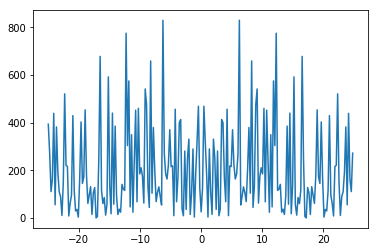

In [105]:
#plot power specturm density 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#pic = Image.open('')
#data = np.array(pic)
data = np.random.randn(224) 
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 50

freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])



In [ ]:
import os
subjectid = os.listdir('D:\cnnface/female_male_test_51_addnoise\pure')
female_id = ['n001181', 'n001333', 'n001459', 'n001617', 'n002085', 'n002285',
             'n002464', 'n002724', 'n003381', 'n004029', 'n004626', 'n004655', 
             'n005458', 'n005591', 'n006309', 'n008049', 'n008148', 'n008391']
male_id = ['n000004', 'n000006', 'n000061', 'n000081', 'n000142', 'n000154', 
           'n000551', 'n000598', 'n000866', 'n001479', 'n001891', 'n001967', 
           'n002002', 'n002332', 'n002744', 'n003177', 'n003346', 'n004122', 
           'n004535', 'n005265', 'n005653', 'n006208', 'n006815', 'n006912', 
           'n007311', 'n007338', 'n007353', 'n007425', 'n007873', 'n008373', 
           'n008455', 'n008911', 'n009017']

female_list = [subjectid.index(i) for i in female_id]
male_list = [subjectid.index(i) for i in male_id]

a = output1[0]
label = output1[1]

for i,l in enumerate(label):
    if l in female_list:
        label[i] = 0
    elif l in male_list:
        label[i] = 1 
    else:
        print('Unvailed l')
        
test_acc = 1.0*np.sum(a == label)/len(a)


In [2]:
#Adding gassian noise to the morph_face_template
import numpy as np
import os
import skimage
from PIL import Image

mft = Image.open('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.jpg')
mft_arr = np.array(mft)
var = [0.09]
for v in var:
    for i in range(5000):
        mft_noise = skimage.util.random_noise(mft_arr,mode='gaussian',var=v)
        mft_noise = Image.fromarray((mft_noise*255).astype('uint8'))
        mft_noise.save('D:/cnnface/female_male_test_51_addnoise\Face_template_noise/frame54_noise_0.09/frame54_noise_0.09/{}.jpg'.format(i+1),quality=95)
        

In [6]:
#Converting the png picture to jpg

import numpy as np
from PIL import Image

a = Image.open('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.png')

a = a.convert('RGB')

a.save('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.jpg',quality=95)

In [ ]:
#save label to txt file
import numpy as np
label = output[0]
label_f = np.argwhere(label==0)
label_m = np.argwhere(label==1)

np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_garbo_f.txt',label_f)
np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_garbo_m.txt',label_m)

In [1]:
#extract dnn_activation
import argparse
from torchvision import transforms
from torch.utils.data import DataLoader
from dnnbrain.dnn import analyzer
from dnnbrain.dnn import io as dnn_io

stim = 'D:/cnnface/male_famale_contrast_train.csv'
netloader = dnn_io.NetLoader('alexnet')
imgcropsize = netloader.img_size
transform = transforms.Compose([transforms.Resize(imgcropsize),
                                    transforms.ToTensor()])  
picdataset = dnn_io.PicDataset(stim, transform=transform)
picdataloader = DataLoader(picdataset, batch_size=1, shuffle=False)
dnn_act = analyzer.dnn_activation(picdataloader, 'alexnet', 'fc3')


The activation of the 100 image has been calculated.
The activation of the 200 image has been calculated.
The activation of the 300 image has been calculated.
The activation of the 400 image has been calculated.
The activation of the 500 image has been calculated.
The activation of the 600 image has been calculated.
The activation of the 700 image has been calculated.
The activation of the 800 image has been calculated.
The activation of the 900 image has been calculated.
The activation of all images have been calculated.


In [12]:
import numpy as np
from PIL import Image

diff = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/diff.jpg')
diff_arr = np.array(diff)

diff_mask = np.zeros(diff_arr)

diff_r = diff_mask
diff_r = diff_mask[:,:,0] 

In [2]:
#add CI to base image import os 
import numpy as np
from PIL import Image

CI_path = 'D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/diff_g.jpg'
base_face_path = 'D:/cnnface/female_male_test_51_addnoise/Face_template/face_template/frame054.jpg'

CI = Image.open(CI_path)
CI = CI.convert('RGB')
base_face = Image.open(base_face_path)

CI_arr = np.array(CI)
base_face_arr = np.array(base_face)

base_add_arr = base_face_arr + CI_arr
base_sub_arr = base_face_arr - CI_arr

base_add = Image.fromarray(base_add_arr)
base_sub = Image.fromarray(base_sub_arr)

base_add.save('D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/diff_g_add.jpg')
base_sub.save('D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/diff_g_sub.jpg')